In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [35]:
df = pd.read_csv('MBA.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [36]:
df = df.drop('application_id',axis=1)
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [37]:
df['international'] = df['international'].map({False: 0, True: 1})
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})
df['admission'] = df['admission'].fillna('Deny')
df['admission'] = df['admission'].map({'Admit': 1, 'Waitlist': 2, 'Deny': 0})

df

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,0,3.30,Business,Asian,620.0,3.0,Financial Services,1
1,0,0,3.28,Humanities,Black,680.0,5.0,Investment Management,0
2,1,1,3.30,Business,NaN,710.0,5.0,Technology,1
3,0,0,3.47,STEM,Black,690.0,6.0,Technology,0
4,0,0,3.35,STEM,Hispanic,590.0,5.0,Consulting,0
...,...,...,...,...,...,...,...,...,...
6189,0,0,3.49,Business,White,640.0,5.0,Other,0
6190,0,0,3.18,STEM,Black,670.0,4.0,Consulting,0
6191,1,1,3.22,Business,NaN,680.0,5.0,Health Care,1
6192,0,1,3.36,Business,NaN,590.0,5.0,Other,0


In [38]:
df = pd.get_dummies(df, columns=['major', 'race', 'work_industry'])
df

,gender,international,gpa,gmat,work_exp,admission,major_Business,major_Humanities,major_STEM,race_Asian,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1,0,3.30,620.0,3.0,1,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,0,3.28,680.0,5.0,0,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,1,1,3.30,710.0,5.0,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,3.47,690.0,6.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,3.35,590.0,5.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,0,0,3.49,640.0,5.0,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6190,0,0,3.18,670.0,4.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6191,1,1,3.22,680.0,5.0,1,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6192,0,1,3.36,590.0,5.0,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [39]:
df_noWaitlist = df[df['admission'] != 2]
df_noWaitlist

,gender,international,gpa,gmat,work_exp,admission,major_Business,major_Humanities,major_STEM,race_Asian,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1,0,3.30,620.0,3.0,1,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,0,3.28,680.0,5.0,0,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,1,1,3.30,710.0,5.0,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,3.47,690.0,6.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,3.35,590.0,5.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,0,0,3.49,640.0,5.0,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6190,0,0,3.18,670.0,4.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6191,1,1,3.22,680.0,5.0,1,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6192,0,1,3.36,590.0,5.0,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [40]:
column_to_move = df_noWaitlist.pop('gpa')
df_noWaitlist['gpa'] = column_to_move

column_to_move = df_noWaitlist.pop('admission')
df_noWaitlist['admission'] = column_to_move
df

C:\Users\clair\AppData\Local\Temp\ipykernel_42024\740857378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noWaitlist['gpa'] = column_to_move
C:\Users\clair\AppData\Local\Temp\ipykernel_42024\740857378.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noWaitlist['admission'] = column_to_move


,gender,international,gpa,gmat,work_exp,admission,major_Business,major_Humanities,major_STEM,race_Asian,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1,0,3.30,620.0,3.0,1,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,0,3.28,680.0,5.0,0,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,1,1,3.30,710.0,5.0,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,3.47,690.0,6.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,3.35,590.0,5.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,0,0,3.49,640.0,5.0,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6190,0,0,3.18,670.0,4.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6191,1,1,3.22,680.0,5.0,1,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6192,0,1,3.36,590.0,5.0,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [41]:
from sklearn.model_selection import train_test_split

X = df_noWaitlist.drop('admission', axis = 'columns').values
y = df_noWaitlist['admission']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty=None)


# Selecting GPA from X data
Xtrain_gpa = Xtrain[:, -1].reshape(-1, 1)
Xtest_gpa = Xtest[:, -1].reshape(-1, 1)

lr.fit(Xtrain_gpa, ytrain)
y_pred = lr.predict(Xtest_gpa) 
y_pred_prob = lr.predict_proba(Xtest_gpa)[:, 1]  # Probabilities of Outcome=1
y_pred_prob.shape

(1829,)

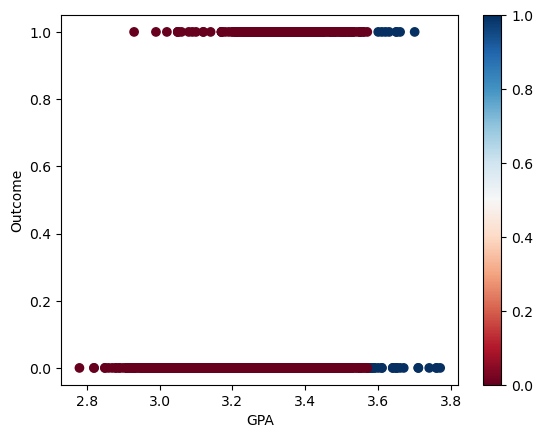

In [43]:
plt.scatter(Xtest_gpa, ytest, c=y_pred, cmap='RdBu')
plt.colorbar()
plt.xlabel('GPA')
plt.ylabel('Outcome')
plt.show()

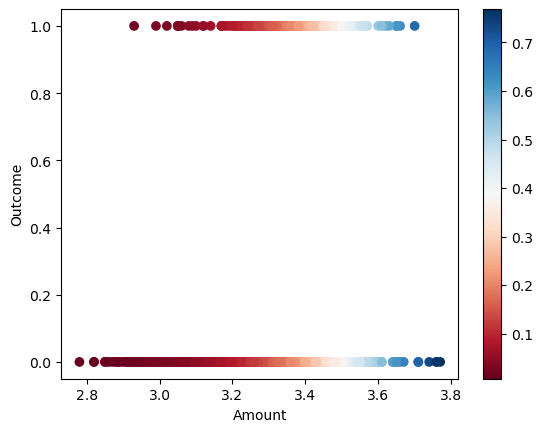

In [44]:
plt.scatter(Xtest_gpa, ytest, c=y_pred_prob, cmap='RdBu')
plt.colorbar()
plt.xlabel('Amount')
plt.ylabel('Outcome')
plt.show()

Number of positive predicitons: 33
Accuracy = 0.8387096774193549
Precision = 0.24242424242424243
Recall = 0.02877697841726619
F1 Score = 0.05144694533762058
Sensitivity (Recall) for Only GPA: 0.02877697841726619
Specificity for Only GPA: 0.9838813668600903


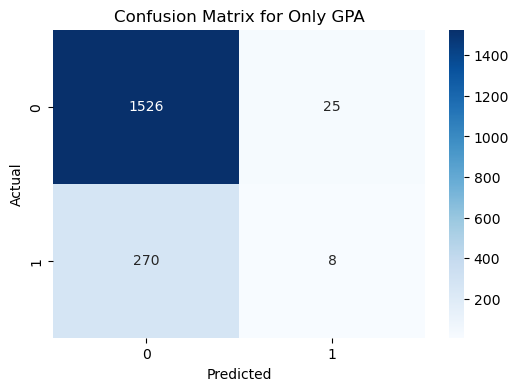

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def labelBasedCriteria(y_test, y_pred, y_pred_prob, title):
    predicted = pd.DataFrame(y_pred_prob)
    positivePredictions = predicted[predicted[0] >= 0.5]
    print(f"Number of positive predicitons: {positivePredictions.size}")

    accuracy = accuracy_score(y_test, y_pred) # 99.8% classified correctly
    precision = precision_score(y_test, y_pred) # 0.0 -> Every positive predicition was a false positive (incorrect)
    recall = recall_score(y_test, y_pred) # 0.0 -> No true positive was correctly predicted to be positive 
    f1Score = f1_score(y_test, y_pred) # 0.0 -> Model is completely ineffective at identifying the positive class
    print(f"Accuracy = {accuracy}\nPrecision = {precision}\nRecall = {recall}\nF1 Score = {f1Score}")

    # Calculate Sensitivity and Specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)  # Specificity
    print(f"Sensitivity (Recall) for {title}: {sensitivity}")
    print(f"Specificity for {title}: {specificity}")
    
    # Plot confusion matrix heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix for {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

labelBasedCriteria(ytest, y_pred, y_pred_prob, 'Only GPA')

In [46]:
lr_all = LogisticRegression(max_iter=10000)

lr_all.fit(Xtrain, ytrain)
y_pred_all = lr_all.predict(Xtest)
y_pred_all_prob = lr_all.predict_proba(Xtest)[:, 1]  # Probabilities of Outcome=1

lr_all.coef_, lr_all.intercept_

(array([[ 0.86952702,  0.02185131,  0.01897077,  0.05799099, -0.07159801,
          0.00594194,  0.0237343 ,  0.21013648, -0.59902458, -0.23022878,
          0.23502129,  0.32032252,  0.07558211,  0.08602502, -0.95808184,
          0.58222008, -0.05926075, -0.00570583,  0.44453886, -0.34859435,
         -0.10658071, -0.18418199, -0.11320846,  0.35072992, -0.15740018,
          0.35199636,  2.88413227]]),
 array([-24.71518891]))

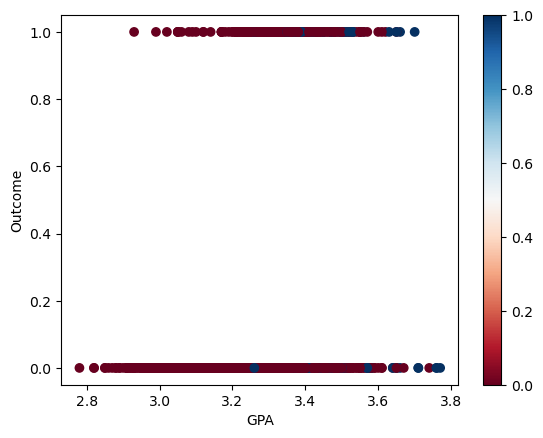

In [48]:
plt.scatter(Xtest[:, -1], ytest, c=y_pred_all, cmap='RdBu')
plt.colorbar()
plt.xlabel('GPA')
plt.ylabel('Outcome')
plt.show()

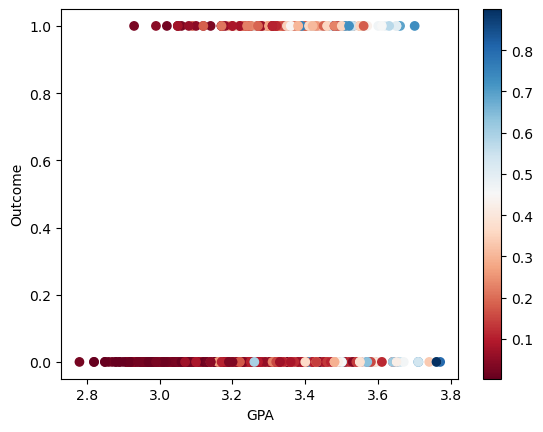

In [49]:
plt.scatter(Xtest[:, -1], ytest, c=y_pred_all_prob, cmap='RdBu')
plt.colorbar()
plt.xlabel('GPA')
plt.ylabel('Outcome')
plt.show()

Number of positive predicitons: 95
Accuracy = 0.8387096774193549
Precision = 0.4105263157894737
Recall = 0.14028776978417265
F1 Score = 0.20911528150134048
Sensitivity (Recall) for All Features: 0.14028776978417265
Specificity for All Features: 0.9638942617666022


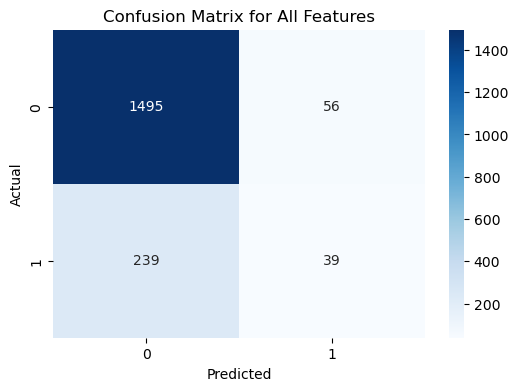

In [50]:
labelBasedCriteria(ytest, y_pred_all, y_pred_all_prob, 'All Features')